# setting

In [1]:
#install.packages('BayesFactor')

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘hypergeo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
source("~/works/utils/r/myutils.r")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
library(BayesFactor)

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.4. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************



# testing

In [5]:
data(raceDolls)

In [8]:
raceDolls

,White child,Black child
Same-race doll,50,48
Different-race doll,21,41


In [6]:
## chi-square test
## Barely significant with continuity correction
chisq.test(raceDolls)


	Pearson's Chi-squared test with Yates' continuity correction

data:  raceDolls
X-squared = 3.8566, df = 1, p-value = 0.04955


In [7]:
## Bayes factor test (assuming independent binomial sampling plan)
## Very little evidence for the alternative of lack of independence
bf = contingencyTableBF(raceDolls, sampleType = "indepMulti", fixedMargin = "cols")
bf

Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 1.814856 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, independent multinomial


In [9]:
chains = posterior(bf, iterations = 10000)

In [18]:
summary(chains)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean      SD  Naive SE Time-series SE
pi[1,1]    0.3110 0.03600 0.0003600      0.0003600
pi[2,1]    0.1338 0.02652 0.0002652      0.0002652
pi[1,2]    0.2988 0.03575 0.0003575      0.0003575
pi[2,2]    0.2564 0.03387 0.0003387      0.0003369
pi[*,1]    0.4449 0.03881 0.0003881      0.0003881
pi[*,2]    0.5551 0.03881 0.0003881      0.0003881
omega[1,1] 0.6991 0.05319 0.0005319      0.0005319
omega[2,1] 0.3009 0.05319 0.0005319      0.0005319
omega[1,2] 0.5382 0.05185 0.0005185      0.0005185
omega[2,2] 0.4618 0.05185 0.0005185      0.0005185

2. Quantiles for each variable:

             2.5%    25%    50%    75%  97.5%
pi[1,1]    0.2430 0.2861 0.3103 0.3349 0.3835
pi[2,1]    0.0858 0.1150 0.1323 0.1510 0.1896
pi[1,2]    0.2313 0.2744 0.2979 0.3217 0.3717
pi[2,2]    0.1927 0.2330 

In [19]:
head(chains)

Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 7 
Thinning interval = 1 
       pi[1,1]   pi[2,1]   pi[1,2]   pi[2,2]   pi[*,1]   pi[*,2] omega[1,1]
[1,] 0.2859347 0.1580720 0.3442860 0.2117073 0.4440067 0.5559933  0.6439874
[2,] 0.3020607 0.1330185 0.3027489 0.2621719 0.4350792 0.5649208  0.6942660
[3,] 0.3067319 0.1773225 0.2579284 0.2580172 0.4840544 0.5159456  0.6336724
[4,] 0.2465813 0.1065266 0.3424684 0.3044237 0.3531079 0.6468921  0.6983171
[5,] 0.3462654 0.1383934 0.2872119 0.2281293 0.4846587 0.5153413  0.7144519
[6,] 0.3522562 0.1201817 0.2854078 0.2421543 0.4724379 0.5275621  0.7456139
[7,] 0.3603475 0.1091560 0.2599277 0.2705688 0.4695035 0.5304965  0.7675076
     omega[2,1] omega[1,2] omega[2,2]
[1,]  0.3560126  0.6192269  0.3807731
[2,]  0.3057340  0.5359139  0.4640861
[3,]  0.3663276  0.4999140  0.5000860
[4,]  0.3016829  0.5294058  0.4705942
[5,]  0.2855481  0.5573237  0.4426763
[6,]  0.2543861  0.5409938  0.4590062
[7,]  0.2324924  0.4899706  0.5100294

In [10]:
sameRaceGivenWhite = chains[,"pi[1,1]"] / chains[,"pi[*,1]"]
sameRaceGivenBlack = chains[,"pi[1,2]"] / chains[,"pi[*,2]"]

In [14]:
my.figsize(10,5)

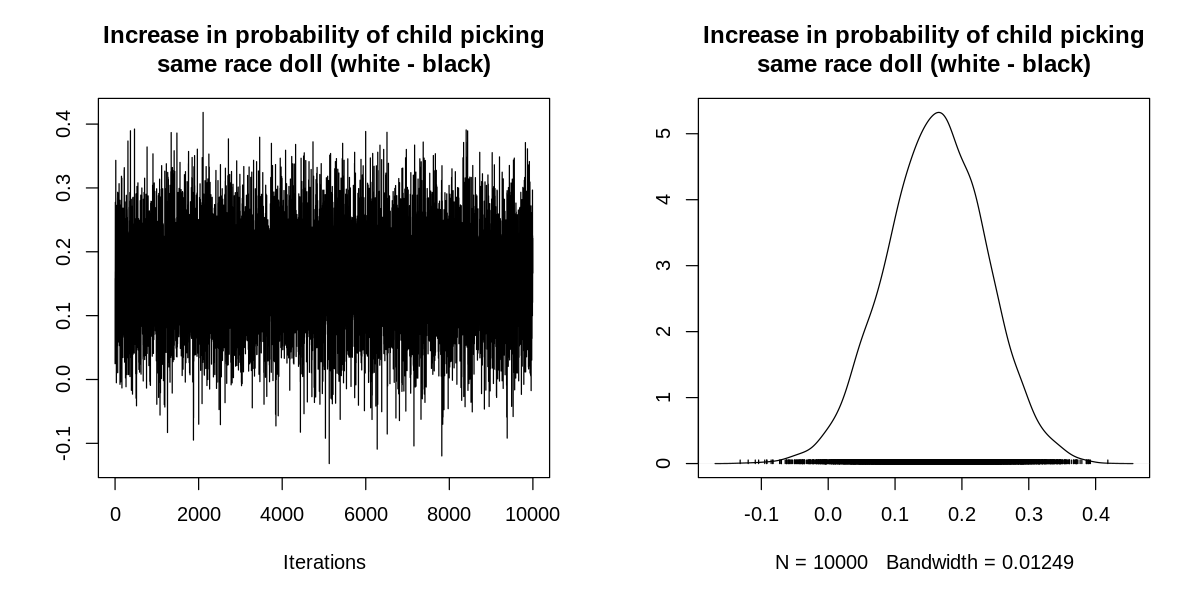

In [15]:
plot(mcmc(sameRaceGivenWhite - sameRaceGivenBlack), main = "Increase in probability of child picking\nsame race doll (white - black)")

# ST01
결혼 의향과 페미니즘에 대한 태도 관계

Result:
- 

In [8]:
r1 <- c(93,72,86)
r2 <- c(40,126,162)
marFem <- rbind(r1, r2)
colnames(marFem) <- c('agree','neutral','disagree')
rownames(marFem) <- c('Don\'t want to marry', 'want to marry')
marFem

,agree,neutral,disagree
Don't want to marry,93,72,86
want to marry,40,126,162


In [4]:
# chi-square test
# Barely significant with continuity correction
chisq.test(marFem)


	Pearson's Chi-squared test

data:  marFem
X-squared = 49.778, df = 2, p-value = 1.552e-11


In [5]:
# Bayes factor test (assuming independent binomial sampling plan)
# Very little evidence for the alternative of lack of independence
bf = contingencyTableBF(marFem, sampleType = "indepMulti", fixedMargin = "rows")
#bf = contingencyTableBF(marFem, sampleType = "jointMulti")
bf

Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 1011909083 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, independent multinomial


In [21]:
chains = posterior(bf, iterations = 50000)

In [22]:
nomarPos = chains[,"pi[1,1]"] / chains[,"pi[1,*]"]
nomarNeg = chains[,"pi[1,3]"] / chains[,"pi[1,*]"]

In [16]:
my.figsize(12,5)

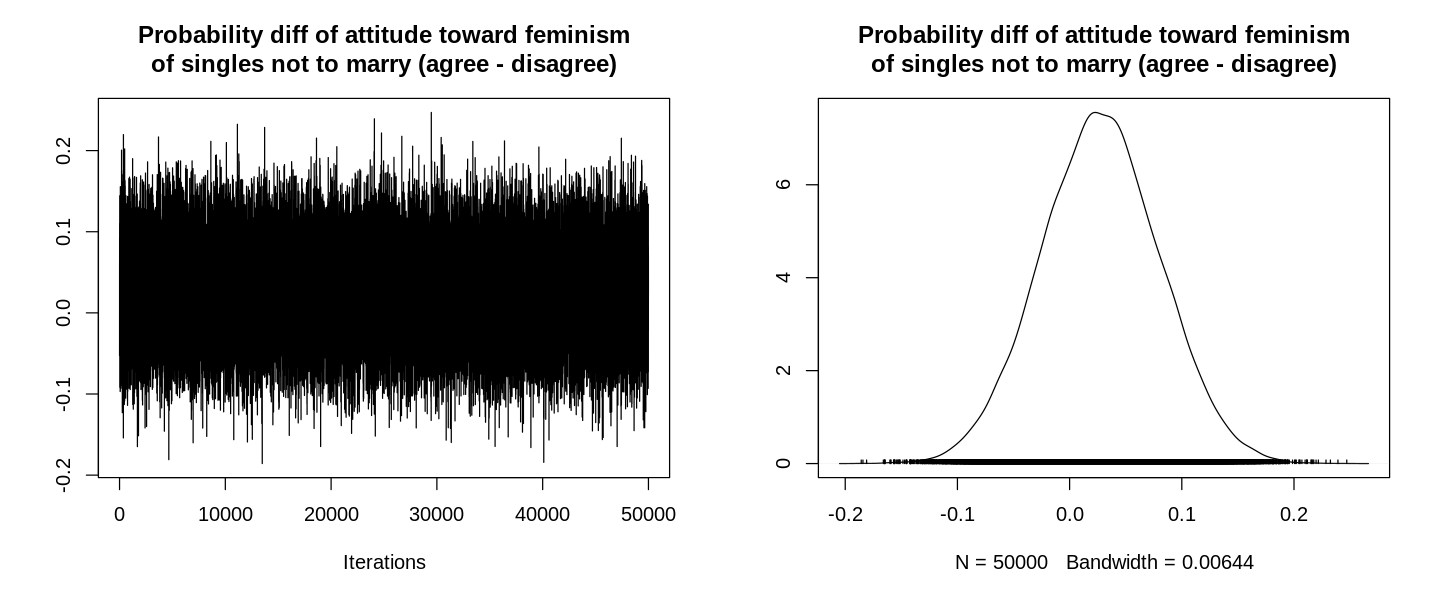

In [23]:
plot(mcmc(nomarPos - nomarNeg), main = "Probability diff of attitude toward feminism\nof singles not to marry (agree - disagree)")

In [24]:
nomarPos = chains[,"pi[2,1]"] / chains[,"pi[2,*]"]
nomarNeg = chains[,"pi[2,3]"] / chains[,"pi[2,*]"]

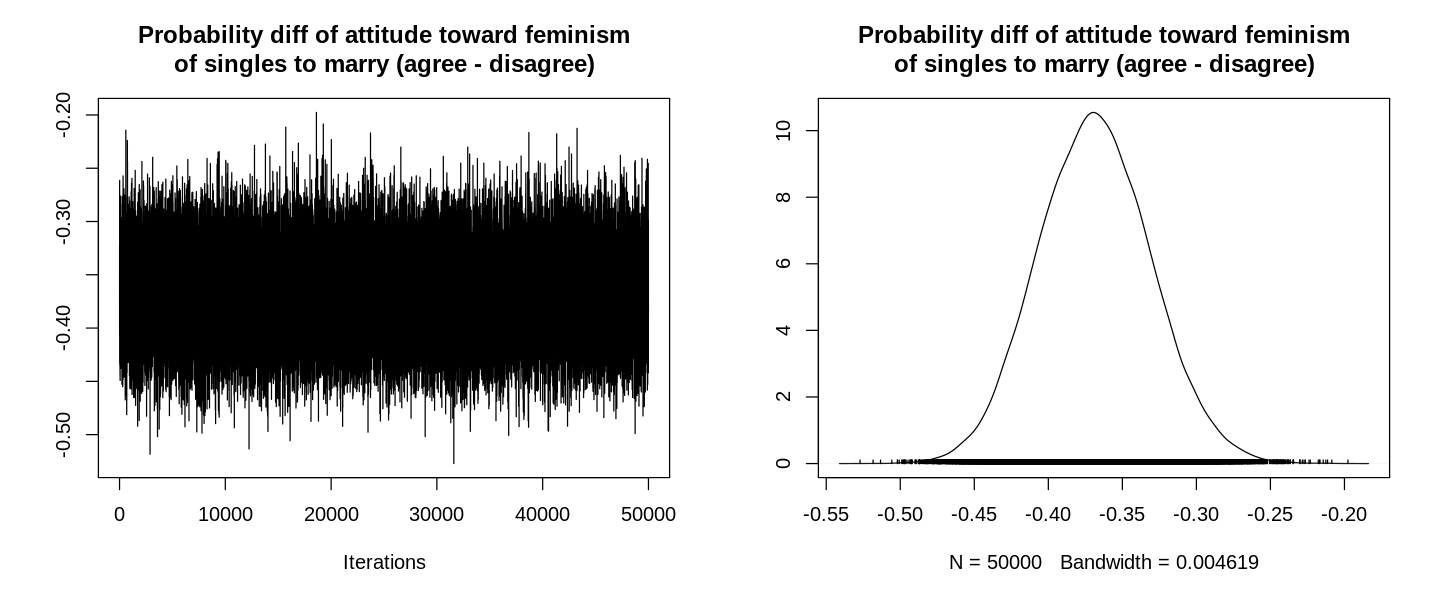

In [25]:
plot(mcmc(nomarPos - nomarNeg), main = "Probability diff of attitude toward feminism\nof singles to marry (agree - disagree)")